In [65]:
import sys
import socket
isliv = 'livljobs' in socket.gethostname()
if isliv:
 sys.path.insert(0,'/login/jholt/work/Git/COAsT/')
else:
 sys.path.insert(0,'/home/users/jholt/Git/COAsT/')
sys.path.insert(0,'./')
import matplotlib.pylab as plt
import coast
import numpy as np
import pickle
import pandas as pd
import cartopy.crs as ccrs  # mapping plots
#import surfacefields as sf
import scipy 

In [66]:
names,dpaths,DOMS,_  = coast.experiments(experiments='../Python/experiments-CLASS-triad2.json')

In [67]:
names

['ORCA1', 'ORCA025', 'ORCA0083', 'GS1p2_full', 'GS1p1_tide', 'GS1p0_notide']

In [68]:
X=2.0
Y=60

year_start=1990
year_stop =1999#2009
fn_config_t_grid='../Config/senemo_grid_t.json'
directory=dpaths[iexp]
run_name=names[iexp]
SL={}
for iexp in [3,5]:
  nemo_dom=coast.Gridded(fn_domain= DOMS[iexp],config=fn_config_t_grid,multiple=False,no_depths=True)
  j,i,_=nemo_dom.find_j_i_list(lon=X,lat=Y)
  
  fnames= coast.nemo_filename_maker(dpaths[iexp],year_start,year_stop,grid='T') 
  
  nemo = coast.Gridded(fn_data= fnames, fn_domain= DOMS[iexp],config=fn_config_t_grid,multiple=True,no_depths=True)
  nemo.subset(y_dim=j,x_dim=i)
  SL[iexp]=nemo.dataset.ssh.values[:,0,0]

In [74]:
t=1990+nemo.dataset.t_dim.values[:]/12

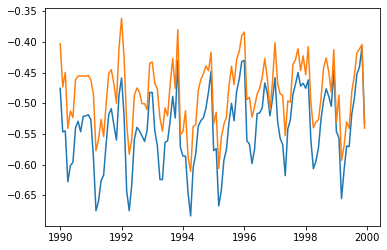

In [75]:

plt.plot(t,SL[3],t,SL[5])

In [71]:
SL[3]

array([-0.47567612, -0.5465876 , -0.54492515, -0.62789214, -0.60164   ,
       -0.5959973 , -0.5398782 , -0.52926064, -0.5463391 , -0.5214149 ,
       -0.5204727 , -0.51874185, -0.52661926, -0.5877578 , -0.6750504 ,
       -0.65939146, -0.6257955 , -0.61692405, -0.5641698 , -0.517852  ,
       -0.50873446, -0.53541183, -0.55979747, -0.4868813 , -0.45873624,
       -0.5215427 , -0.6426493 , -0.6748883 , -0.63236505, -0.5592342 ,
       -0.5391029 , -0.5449078 , -0.5531767 , -0.5621414 , -0.5436922 ,
       -0.48232114, -0.48243797, -0.54455477, -0.56920993, -0.62403774,
       -0.624229  , -0.56348366, -0.56137216, -0.5286214 , -0.48869285,
       -0.52404666, -0.43028376, -0.5714065 , -0.5858491 , -0.58614343,
       -0.64636666, -0.6834399 , -0.6049443 , -0.58219683, -0.5371618 ,
       -0.52830255, -0.52373177, -0.5075389 , -0.48140618, -0.4477328 ,
       -0.57698035, -0.57391447, -0.6670715 , -0.64224875, -0.59319794,
       -0.57573956, -0.5307288 , -0.50012773, -0.52845854, -0.48

In [72]:
np.std(SL[3])

0.0603283

In [73]:
np.std(SL[5])

0.05226352